In [16]:
import random
import threading
import time
import multiprocessing
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import platform
if platform.system() == 'Linux':
    import psutil
    pt = psutil.Process()
    all_cpus = list(range(psutil.cpu_count()))
    pt.cpu_affinity(all_cpus)
    pt.cpu_affinity()
else:
    print('Only Linux/FreeBSD support cpu_affinity.')

Only Linux/FreeBSD support cpu_affinity.


In [5]:
def getPi(num=10000):
    k = 0
    r = 1.0
    for _ in range(num):
        x = random.random()
        y = random.random()
        if x**2 + y**2 < r:
            k=k+1
    pi = 4* float(k)/float(num)
    print('PI is: {}'.format(pi))

In [6]:
MC_loop = 10000000
core_num = multiprocessing.cpu_count()
work = [MC_loop]*4

In [7]:
time_start_mt = time.time()
for _ in range(core_num):
    t = threading.Thread(target = getPi(MC_loop))
    t.start()
    #t.join()
time_end_mt = time.time()
print('The total time is:{}'.format(time_end_mt-time_start_mt))

PI is: 3.1407136
PI is: 3.1416512
PI is: 3.1413272
PI is: 3.141208
The total time is:16.0399010181427


In [8]:
pl = multiprocessing.Pool(core_num)
time_start_pl = time.time()
pl.map(getPi,work)
time_end_pl = time.time()
print('The total time is:{}'.format(time_end_pl-time_start_pl))

PI is: 3.1421596
PI is: 3.1412996
PI is: 3.1424872
PI is: 3.1420908
The total time is:8.361805200576782


In [14]:
def sqrt(x, cor = 0):
    return (np.sqrt(x),cor)

In [25]:
num_lattice = 1000
num_period = 10

In [26]:
x = np.arange(0,np.pi * num_period, np.pi * num_period/num_lattice)

In [31]:
len(x)

1000

In [27]:
y =np.absolute(np.sin(x))

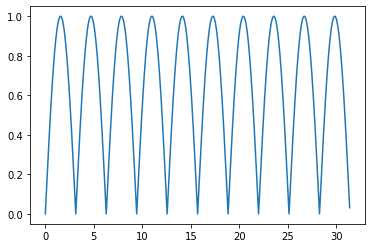

In [28]:
plt.plot(x,y)

In [29]:
y_sqrt = np.sqrt(y)

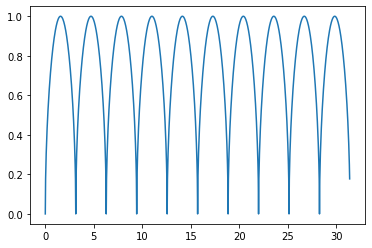

In [30]:
plt.plot(x,y_sqrt)

In [32]:
y_func_sqrt = np.zeros(num_lattice)

In [ ]:
for i,number in enumerate(x):
    